In [6]:
import numpy as np

class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # covariance, functions needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [34]:
import pickle

# Load the list from the file using pickle
with open("output_file.pkl", "rb") as f:
    my_list = pickle.load(f)



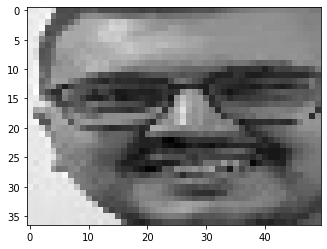

In [35]:
import matplotlib.pyplot as plt
import cv2

# Get a random image from the dataset
sample_image = my_list[0][20]
sample_image = sample_image.reshape(37,50)
# Display the image

plt.imshow(sample_image, cmap='gray')
plt.show()

In [36]:
X , y = my_list

In [37]:
X = np.array(X)

In [38]:
X

array([[  1,   2,   3, ..., 163, 143, 120],
       [ 70,  68,  68, ...,  61,  64,  65],
       [116,  69,  30, ...,  33,  30,  15],
       ...,
       [217, 201, 205, ..., 192, 200, 199],
       [ 29,  19,  16, ..., 252, 255, 252],
       [218, 222, 221, ..., 238, 239, 239]], dtype=uint8)

In [39]:
print(X.shape)

(39, 1850)


In [40]:
import numpy as np
from sklearn import  metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn import svm

In [45]:
# Apply PCA to the raw pixel values
n_components = 39
pca = PCA(n_components=n_components)
eigenfaces = pca.fit(X)
eigenfaces = pca.transform(X)

In [46]:
eigenfaces.shape

(39, 39)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(eigenfaces, y, test_size=0.2)


In [48]:
# Train an SVM model using the training set
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [49]:
y_pred = clf.predict(X_test)


In [50]:
X_test

array([[ 4.95580253e+02,  1.70752467e+02,  1.55035744e+03,
         5.50305910e+02, -4.25057109e+02, -3.10680204e+01,
        -4.31361925e+02, -1.59464606e+02,  3.93017284e+02,
         9.93135218e+01,  7.51911577e+01, -1.19209867e+02,
        -3.30408360e+02,  2.85155730e+02,  4.72610834e+01,
         2.06769393e+02,  3.52957666e+02,  3.52257329e+02,
         3.29149107e+02, -2.10989100e+02,  1.33809212e+02,
         1.27513591e+01, -1.53106414e+02, -5.55314593e+00,
        -6.29549798e+01,  6.52150163e+01, -2.44578352e+02,
        -1.67392440e+02,  8.95128401e+01, -2.46275158e+02,
        -1.13292123e+02,  5.39687391e+01, -4.94794345e+01,
        -1.79147076e+02,  6.97795462e+00,  2.32987241e-13,
         2.81774604e-13, -1.63424829e-13, -2.48689958e-14],
       [-1.44506740e+03, -1.23811274e+03,  1.25463464e+03,
         2.17342844e+01,  9.66714708e+01,  1.85540245e+01,
         1.83646515e+02, -1.51016868e+02, -1.96281544e+02,
        -4.14179118e+02,  6.63289161e+01,  1.79394964e+

In [51]:
# Evaluate the performance of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 score: {f1_score}")

Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 score: 0.75


In [52]:
names = {0:"mina george",1:"mina safwat",2:"abram"}

In [68]:
import cv2

def predict_image(path,model,pca,names):
    # Load the pre-trained face detection classifier
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    # Set the new width and height
    new_width = 500
    new_height = 500

    img = cv2.imread(path)

    # Resize the image
    resized_img = cv2.resize(img, (new_width, new_height))
    gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    print(faces)
    for (x, y, w, h) in faces:
        cropped_img = gray[y:y+h, x:x+w]

    cropped_img = cv2.resize(cropped_img,(50,37))
    flatten_img = cropped_img.flatten().reshape(1,-1)
    flatten_img = pca.transform(flatten_img)
    result = model.predict(flatten_img)
    confidence = model.decision_function(flatten_img)

    # Print the prediction and confidence
    print("Prediction:", names[int(result)])
    print("Confidence:", confidence)

In [87]:
predict_image("6.jpg",clf,pca,names)

[[262  80 104 104]]
Prediction: abram
Confidence: [[-0.17410869  1.15059586  2.07073542]]
